<a href="https://colab.research.google.com/github/ashishvuthunoori/AIML-25_B15/blob/main/2303A51990___Q08___B15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-27-5ff0106ad33f>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='coolwarm')


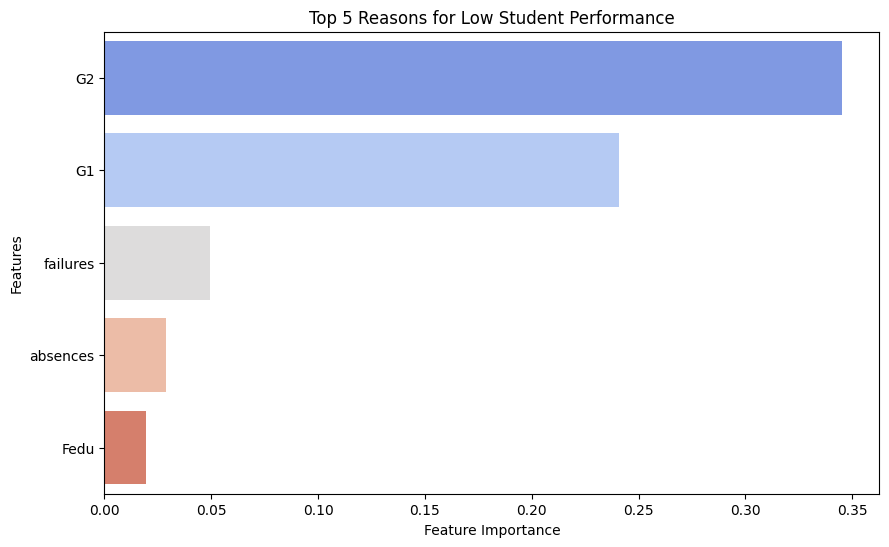

Top 5 Reasons for Low Performance:
 G2          0.345429
G1          0.240882
failures    0.049218
absences    0.028779
Fedu        0.019596
dtype: float64


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load datasets with correct delimiter
mat_df = pd.read_csv('/content/student-mat.csv', delimiter=';')
por_df = pd.read_csv('/content/student-por.csv', delimiter=';')

# Combine datasets
combined_df = pd.concat([mat_df, por_df]).drop_duplicates().reset_index(drop=True)

# Encode categorical features
le = LabelEncoder()
for column in combined_df.select_dtypes(include=['object']).columns:
    combined_df[column] = le.fit_transform(combined_df[column])

# Define target: classify 'low performance' (e.g., G3 <= 10)
combined_df['low_performance'] = (combined_df['G3'] <= 10).astype(int)
X = combined_df.drop(columns=['G3', 'low_performance'])
y = combined_df['low_performance']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(5)

# Plot the top 5 factors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='coolwarm')
plt.title('Top 5 Reasons for Low Student Performance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

# Print top features
print("Top 5 Reasons for Low Performance:\n", top_features)

In [28]:
import pandas as pd

# Load the datasets with correct delimiter
mat_df = pd.read_csv('/content/student-mat.csv', delimiter=';')
por_df = pd.read_csv('/content/student-por.csv', delimiter=';')

# Combine datasets and remove duplicates
combined_df = pd.concat([mat_df, por_df]).drop_duplicates().reset_index(drop=True)

# Filter rows where both parents are employed
both_employed = combined_df[(combined_df['Mjob'] != 'at_home') & (combined_df['Fjob'] != 'at_home')]

# Count students where both parents are employed
count_both_employed = both_employed.shape[0]

print(f"Number of students with both parents employed: {count_both_employed}")

Number of students with both parents employed: 813


In [29]:
import pandas as pd

# Load the datasets with the correct delimiter
mat_df = pd.read_csv('/content/student-mat.csv', delimiter=';')
por_df = pd.read_csv('/content/student-por.csv', delimiter=';')

# Combine datasets and remove duplicates
combined_df = pd.concat([mat_df, por_df]).drop_duplicates().reset_index(drop=True)

# Find the maximum and minimum age
max_age = combined_df['age'].max()
min_age = combined_df['age'].min()

print(f"Maximum age of students: {max_age}")
print(f"Minimum age of students: {min_age}")

Maximum age of students: 22
Minimum age of students: 15


In [30]:
import pandas as pd

# Load the datasets with the correct delimiter
mat_df = pd.read_csv('/content/student-mat.csv', delimiter=';')
por_df = pd.read_csv('/content/student-por.csv', delimiter=';')

# Combine datasets and remove duplicates
combined_df = pd.concat([mat_df, por_df]).drop_duplicates().reset_index(drop=True)

# Analyze 'school' column to find the most common school (as proxy for medium)
most_common_school = combined_df['school'].value_counts().idxmax()
count_most_common_school = combined_df['school'].value_counts().max()

print(f"The most common school (proxy for medium of instruction) is: {most_common_school}")
print(f"Number of students in this school: {count_most_common_school}")

The most common school (proxy for medium of instruction) is: GP
Number of students in this school: 772


<ipython-input-31-5e3516f3c07b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='activities', y='G3', data=combined_df, palette='coolwarm')


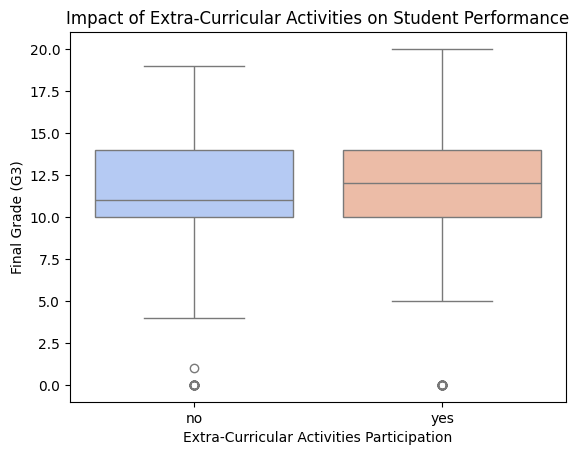

Average performance based on extra-curricular participation:
 activities
no     11.212121
yes    11.474806
Name: G3, dtype: float64


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets with the correct delimiter
mat_df = pd.read_csv('/content/student-mat.csv', delimiter=';')
por_df = pd.read_csv('/content/student-por.csv', delimiter=';')

# Combine datasets and remove duplicates
combined_df = pd.concat([mat_df, por_df]).drop_duplicates().reset_index(drop=True)

# Check the 'activities' column (yes/no) and G3 (final grade)
sns.boxplot(x='activities', y='G3', data=combined_df, palette='coolwarm')
plt.title('Impact of Extra-Curricular Activities on Student Performance')
plt.xlabel('Extra-Curricular Activities Participation')
plt.ylabel('Final Grade (G3)')
plt.show()

# Calculate average G3 for students who do and do not participate
avg_performance = combined_df.groupby('activities')['G3'].mean()

print("Average performance based on extra-curricular participation:\n", avg_performance)

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

mat_df = pd.read_csv('/content/student-mat.csv', delimiter=';')
por_df = pd.read_csv('/content/student-por.csv', delimiter=';')

combined_df = pd.concat([mat_df, por_df]).drop_duplicates().reset_index(drop=True)

combined_df = combined_df.dropna()

le = LabelEncoder()
for column in combined_df.select_dtypes(include=['object']).columns:
    combined_df[column] = le.fit_transform(combined_df[column])

combined_df['low_performance'] = (combined_df['G3'] <= 10).astype(int)

X = combined_df.drop(columns=['G3', 'low_performance'])
y = combined_df['low_performance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Model Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       122
           1       0.93      0.92      0.92        87

    accuracy                           0.94       209
   macro avg       0.94      0.94      0.94       209
weighted avg       0.94      0.94      0.94       209

